In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")
from matplotlib.image import imread

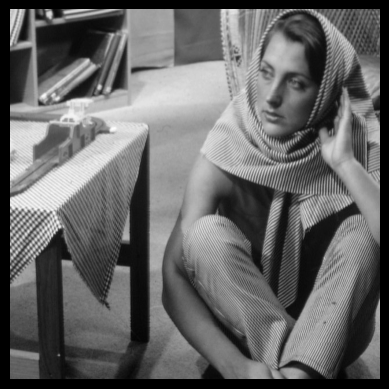

In [2]:
# Read the image
X = imread('images/barbara.jpg')
img = plt.imshow(X, cmap='gray')
plt.axis('off')
plt.show()

In [3]:
X.shape

(640, 640)

In [4]:
# Singular Value Decomposition
U, S, Vt = np.linalg.svd(X, full_matrices=False)

In [5]:
def low_rank_approx(rank, U, S, Vt):
    """
    A function to compute a lower rank approximation of the image.

    Parameters:
    -----------
    - rank (int): Higher the value of rank, the closer the approximated image is to the original imag
    - U (m x m array): Left Singular Vectors which are the columns of matrix U.
    - S (m x n array): Is a diagonal matrix containing the singular values of A.
    - Vt (n x n array): Right Singular Vectors which are the rows of the matrix Vt.
    """
    S = np.diag(S)
    X_approx = U[:, :rank] @ S[:rank, :rank] @ Vt[:rank, :]
    plt.imshow(X_approx, cmap='gray')
    plt.axis('off')
    plt.title('rank = ' + str(rank))
    plt.show()

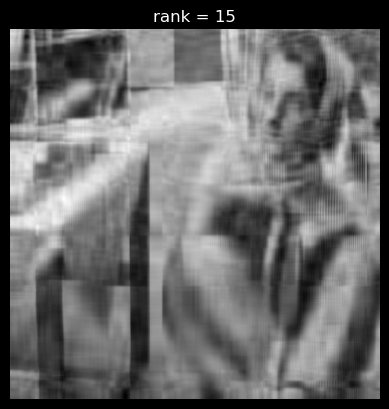

In [6]:
low_rank_approx(15, U, S, Vt)

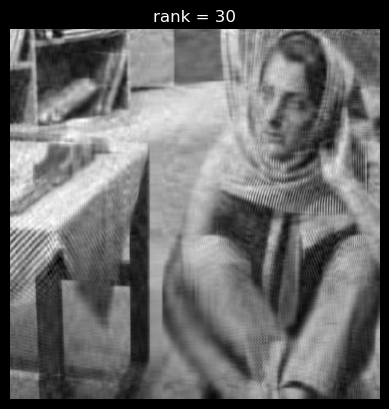

In [7]:
low_rank_approx(30, U, S, Vt)

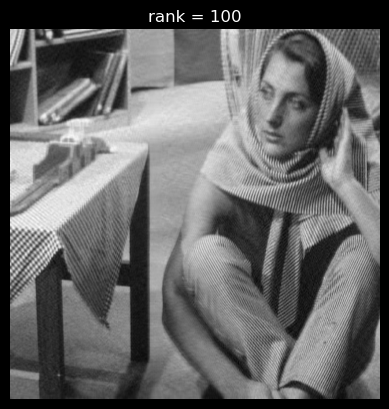

In [8]:
low_rank_approx(100, U, S, Vt)

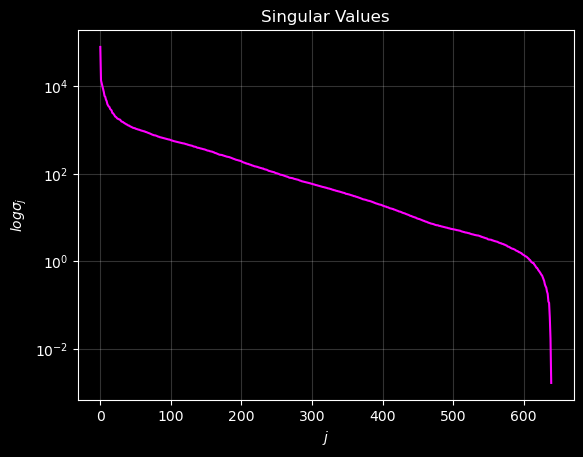

In [9]:
plt.semilogy(S, color='magenta')
plt.title("Singular Values")
plt.xlabel('$j$')
plt.ylabel('$log \sigma_j$')
plt.grid(alpha=0.2)
plt.show()

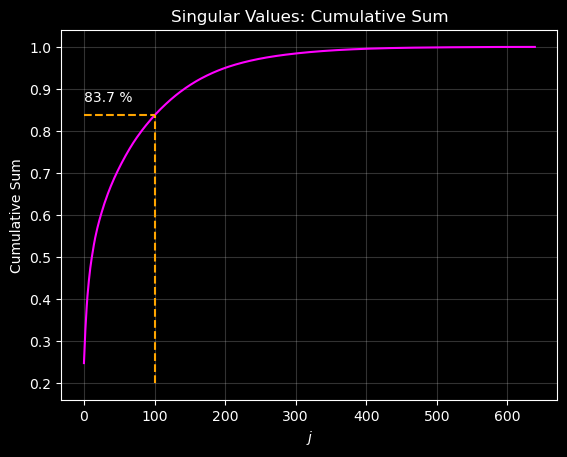

In [10]:
plt.plot(np.cumsum(S/np.sum(S)), color='magenta')
plt.title('Singular Values: Cumulative Sum')
plt.xlabel('$j$')
plt.ylabel('Cumulative Sum')
plt.vlines(x=100, ymin=0.2, ymax=np.cumsum(S/np.sum(S))[100], color='orange', linestyle='--')
plt.hlines(y=np.cumsum(S/np.sum(S))[100], xmin=0.0, xmax=100, color='orange', linestyle='--')
plt.text(x=0, y=0.87, s=f"{round(np.cumsum(S/np.sum(S))[100]*100, 1)} %")
plt.grid(alpha=0.2)
plt.show()

The first 100 singular values capture about 83% of the total variance of the matrix.